## DATA 201
## Exploring bivariate relationships

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Linear correlation coefficients tell you about linear relationships

In [26]:
#fabricated data to make a point
x = np.random.normal(size = 100)
y = x*2+5 

Correlations are typically computed in the form of a matrix.  Each row and column represents one of the variables, with the value in row $n$ and column $m$ being the correlation between the $n$-th and $m$-th variables.  Hence, this matrix will be symmetric, and it will always have 1's along the diagonal, since each variable is perfectly correlated with itself.

In [30]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

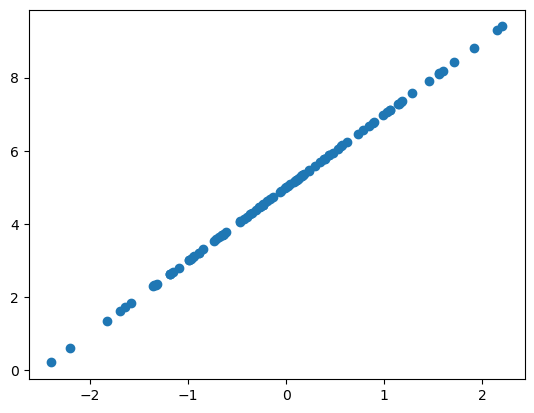

In [27]:
plt.scatter(x,y)
plt.show()

In [31]:
z = x**2 + 5

In [32]:
np.corrcoef(x,z)

array([[ 1.        , -0.02110416],
       [-0.02110416,  1.        ]])

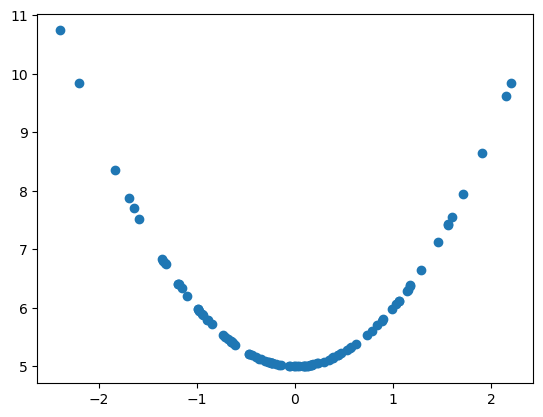

In [33]:
plt.scatter(x,z)
plt.show()

Always, always, look at the data!

## Correlations and scatterplots with real data

Let's start with the GapMinder data:

In [35]:
pd.options.display.max_rows=10 #sets the maximum number of rows and columns displayed when a frame is pretty-printed.
df = pd.read_csv('./data/gapminder.tsv', sep = '\t')
df.head(4)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138


In [36]:
data_2007 = df[df['year'] == 2007].dropna()

What was the relationship between life expectancy and GDP in 2007?

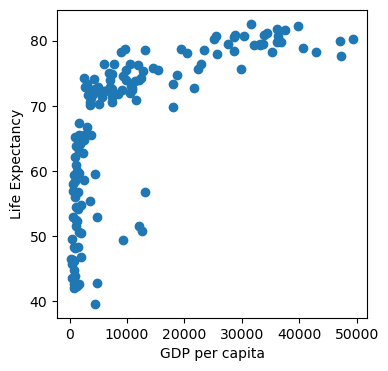

In [38]:
plt.figure(figsize=(4,4))
plt.scatter(data_2007['gdpPercap'],data_2007['lifeExp'])
plt.ylabel('Life Expectancy')
plt.xlabel('GDP per capita')
plt.show()

In [40]:
np.corrcoef(data_2007['lifeExp'], data_2007['gdpPercap'])

array([[1.       , 0.6786624],
       [0.6786624, 1.       ]])

The correlation coefficient tells us about **linear** correlations. Part of the data looks to have a linear pattern but overall the relationship is **logarithmic**. Let's transform our variables and look at their relationship:

In [41]:
data_2007['log_lifeExp']  = np.log10(data_2007['lifeExp'])
data_2007['log_gdpPercap'] = np.log10(data_2007['gdpPercap'])

In [42]:
# notice that this adds two columns
data_2007

,country,continent,year,lifeExp,pop,gdpPercap,log_lifeExp,log_gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,1.641752,2.988818
23,Albania,Europe,2007,76.423,3600523,5937.029526,1.883224,3.773569
35,Algeria,Africa,2007,72.301,33333216,6223.367465,1.859144,3.794025
47,Angola,Africa,2007,42.731,12420476,4797.231267,1.630743,3.680991
59,Argentina,Americas,2007,75.320,40301927,12779.379640,1.876910,4.106510
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,1.870691,3.387670
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,1.865826,3.480776
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,1.797254,3.358081
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,1.627202,3.104218


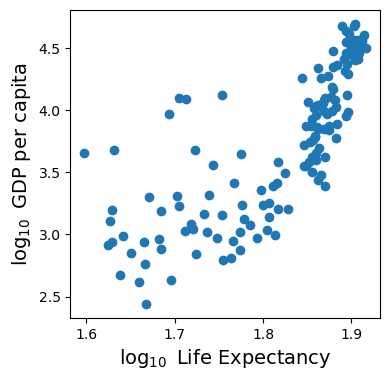

In [43]:
plt.figure(figsize=(4,4))
plt.scatter(data_2007['log_lifeExp'], data_2007['log_gdpPercap'])
plt.xlabel('$\log_{10}$ Life Expectancy', fontsize=14)
plt.ylabel('$\log_{10}$ GDP per capita', fontsize=14)
plt.show()

In [44]:
np.corrcoef(data_2007['log_lifeExp'], data_2007['log_gdpPercap'])

array([[1.        , 0.78007058],
       [0.78007058, 1.        ]])

In fact, the data is more highly correlated on a logarithmic scale.  Because of this we might expect a simple linear model to do a fairly good job predicting the values of one of the variables based on the other, and we would also expect better performance if the data is represented on a logarithmic scale.

## Matrices of scatterplots and correlations

While they are obviously useful for exploring the relationship between two variables, what can we do if we have more than two variables?  At this point, things can become a little more complicated.  We are in fact constrained by living in a 3(4)-d world where we often present information on a 2-d screen.  

Let's try to visualize all three numerical (untransformed) variables in this data - population, life expectancy, and GDP.

As long as the number of variables is still relatively small, you might be able to look at scatter plots of all pairwise combinations of the variables.  The seaborn library has a function for this purpose, called a 'pairplot'.

In [19]:
import seaborn as sns

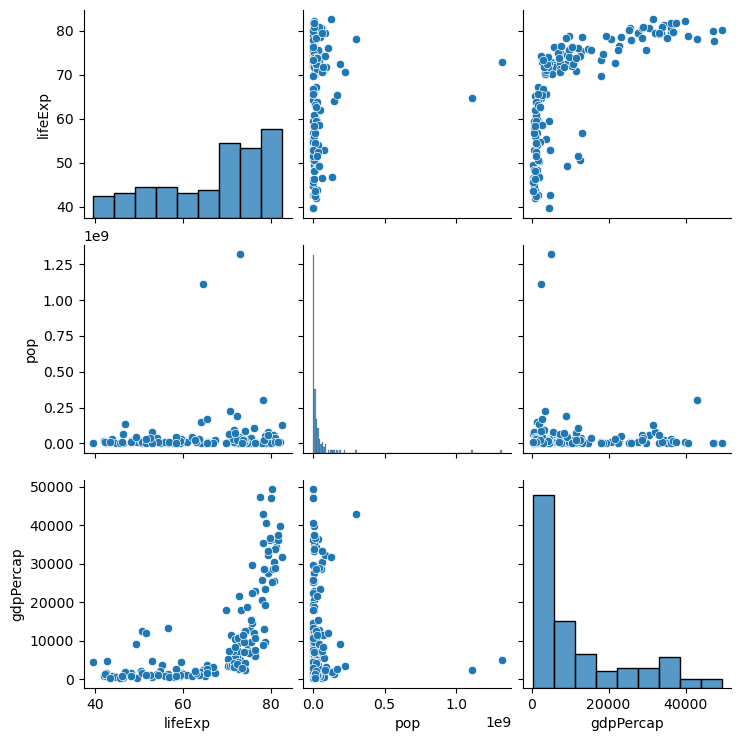

In [45]:
sns.pairplot(data_2007[['lifeExp','pop','gdpPercap']])
plt.show()

Let's look at the correlation coefficients for all pairs of numeric variables including the log transformed variables:

In [46]:
cols = ['lifeExp', 'pop', 'gdpPercap', 'log_lifeExp', 'log_gdpPercap']
corr_matrix = np.corrcoef(data_2007[cols], rowvar=False) #indicate that each col is a variable

In [47]:
corr_matrix

array([[ 1.        ,  0.04755312,  0.6786624 ,  0.99650235,  0.80898025],
       [ 0.04755312,  1.        , -0.0556756 ,  0.05623144, -0.02353029],
       [ 0.6786624 , -0.0556756 ,  1.        ,  0.63856949,  0.87510881],
       [ 0.99650235,  0.05623144,  0.63856949,  1.        ,  0.78007058],
       [ 0.80898025, -0.02353029,  0.87510881,  0.78007058,  1.        ]])

In [48]:
#We could also do it this way - what's difference???
corr_matrix = data_2007[cols].corr()

In [49]:
corr_matrix

,lifeExp,pop,gdpPercap,log_lifeExp,log_gdpPercap
lifeExp,1.000000,0.047553,0.678662,0.996502,0.808980
pop,0.047553,1.000000,-0.055676,0.056231,-0.023530
gdpPercap,0.678662,-0.055676,1.000000,0.638569,0.875109
log_lifeExp,0.996502,0.056231,0.638569,1.000000,0.780071
log_gdpPercap,0.808980,-0.023530,0.875109,0.780071,1.000000


In [54]:
type(corr_matrix)

pandas.core.frame.DataFrame

We can use either to create a heatmap to visualize the correlations and their strength. It is a good idea to create a scatterplot to verify pairwise correlations for variables of interest.

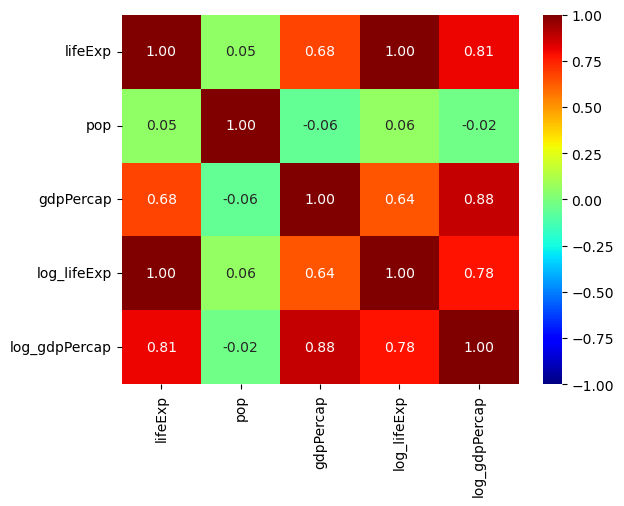

In [50]:
sns.heatmap(corr_matrix, cmap='jet', vmin=-1, vmax=1,
            annot=True, fmt='.2f', xticklabels=cols, yticklabels=cols)
plt.show()

Do we really need to see all of the values twice? This is a lot to look at. Let's see if we can clean this up:

In [51]:
# upper triangle 
mask = np.triu(corr_matrix)

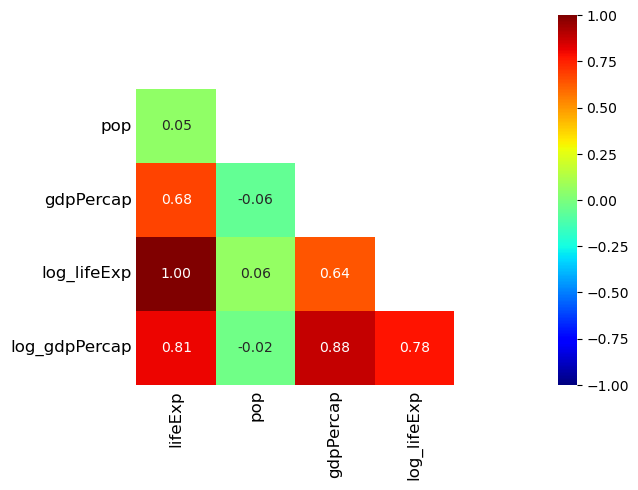

In [52]:

sns.heatmap(corr_matrix, cmap='jet', vmin=-1, vmax=1,
            annot=True, fmt='.2f', xticklabels=cols[:-1], yticklabels=['']+cols[1:],
           mask = mask)
plt.tick_params(size = 0, labelsize = 12)
plt.xticks(rotation = 90)
plt.show()

## A LOT more variables

We will use Python's Scikit-learn module extensively in this class, and you will definitely use it as you continue with data science! One thing the module offers is "toy" data sets for analysis: https://scikit-learn.org/stable/datasets/toy_dataset.html

Let's load one of these - the breast cancer data set. The data consists of imaging results from cell samples including 30 physical measurements related to the size and shape of the cells, along with whether they were benign or malignant.

In [57]:
from sklearn.datasets import load_breast_cancer as lbc
data = lbc()

In [58]:
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [59]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The data set is in several different pieces: data contains an array of numeric data that we might use as features (independent variables) for modeling; feature_names has the names for the features; target contains an array of values of the variable we might be trying to predict - the response/dependent variable; target_names contains the names for the targets. Let's create a data frame of the features:

In [60]:
X = data.data
X_names = data.feature_names
X_df = pd.DataFrame(X, columns=X_names)

In [61]:
X_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Do you think it would be a good idea to make a pair plot of these? Let's at least take a look a the linear correlation coefficients:

In [62]:
corr_matrix = X_df.corr()

In [63]:
mask = np.triu(corr_matrix)

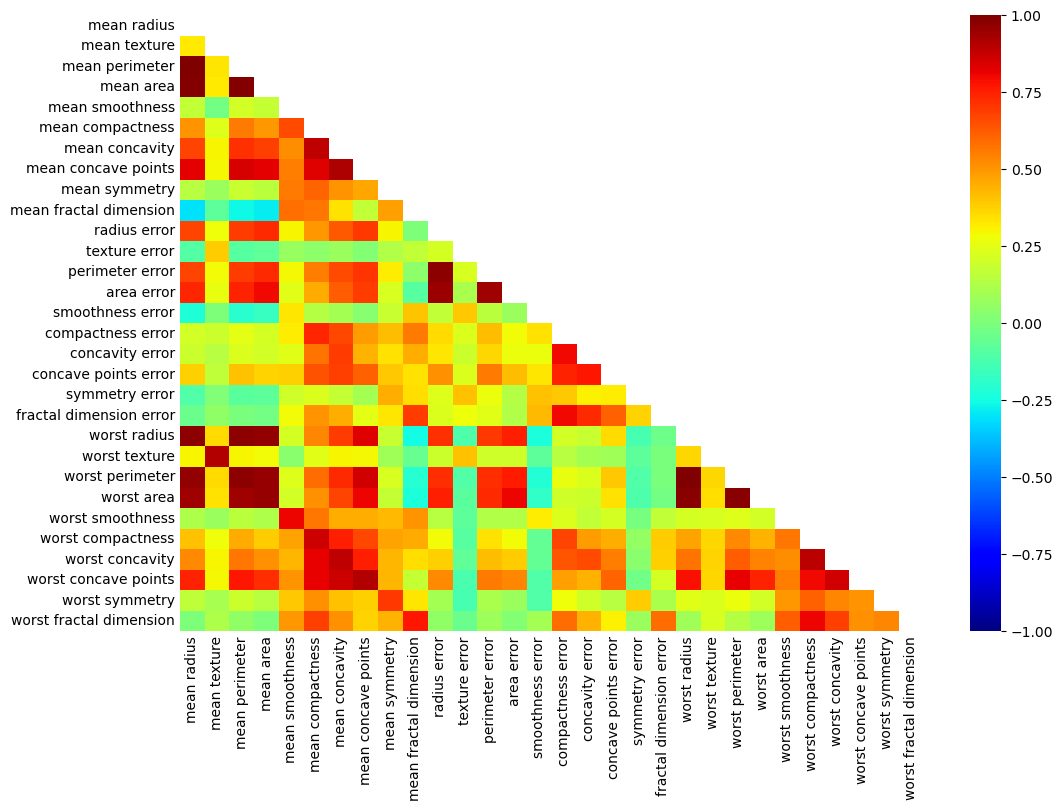

In [64]:
plt.figure(figsize = [12,8])
sns.heatmap(corr_matrix, cmap='jet', vmin=-1, vmax=1, mask = mask)
plt.tick_params(size = 0, labelsize = 10)
plt.xticks(rotation = 90)
plt.show()

What does this tell us? What would be the purpose of something like this?  Something we'll discuss later on is that there are cases where it is not good to include highly correlated variables in a model, so if you discover that there are variables that are highly correlated with each other, you might want to do something like only select 1 of them to include in your model.  More on that later (or lookup multi-collinearity in linear regression)!

What we have here is a set of 30 measurements for each of 569 samples.  For each sample we also have a classification: benign or malignant (basically, group A or group B).  If these 30 measurements actually do contain enough information to classify a sample, then you might expect to be able to "see" this relationship on a plot.  The problem here is that we can't make a 30-dimensional plot on a 2-dimensional screen. How would we do this????